<a id = 'top'></a>

# A quick-start guide to Keras
  * A. [What is Keras?](#introToKeras) 
  * B. [Basic Operations](#kerasBasicOps)  
      * 1. [Sequential interface](#sequentialInterface)
      * 2. [Creating a model](#createModel)
      * 3. [Compiling a model](#compileModel)
      * 4. [Training a model](#trainModel)
      * 5. [Saving a model](#saveModel)
      * 6. [Reloading a model](#reloadModel)
  * C. [Defining your model inside a function to add flexibility](#functionWrapper)

[Return to Top](#top)
<a id = 'introToKeras'></a>
## A. What is Keras?

[Keras](https://en.wikipedia.org/wiki/Keras) is a front-end interface to Tensorflow.  Keras has its own [documentation](https://keras.io/about/) and is also well-documented in [tensorflow keras documentation](https://www.tensorflow.org/api_docs/python/tf/keras).  

Using the Keras interface greatly simplifies the task of constructing, training and using tensorflow models.  In this notebook we'll build and train a basic fully-connected neural net and learn some of the important operations available within Keras.  We'll use the [sequential-model syntax](https://keras.io/guides/sequential_model/), which is useful when becoming familiar with Keras and appropriate for models where each layer has a single output feeding sequentially to the next layer.  

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model
print(tf.__version__)

2.9.1


[Return to Top](#top)
<a id = 'kerasBasicOps'></a>
## B. Basic Operations in Keras

1. Construct the model graph from model input, model layers
2. Build the model (from input, output of the graph)
3. Compile the model with optimizer, metric set, loss function
4. Fit the model / evaluate the model
5. Save the model and re-use the model

[Return to Top](#top)
<a id = 'sequentialInterface'></a>
### B1. Sequential interface

[Return to Top](#top)
<a id = 'createModel'></a>
### B2. Creating a model

In [3]:
hidden_units = 200
model = keras.Sequential(
    [keras.Input(shape=(2,)),
     keras.layers.Dense(200, activation="relu", name="h1_layer"),
     keras.layers.Dense(100, activation="relu", name="h2_layer"),
     keras.layers.Dense(2, activation="sigmoid", name="output_layer"),
    ]
)

2022-08-29 18:31:14.664635: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[Return to Top](#top)
<a id = 'compileModel'></a>
### B3. Compiling a model

In [4]:
# Define loss function, optimizer, and accuracy
# Here we're using some basic loss, optimizer, metrics provided by Keras, all of which use reasonable defaults.

# However if you want to adjust things like learning rate you'll want to use the full Keras functional version of these to have ability to change
# ... the arguments from their default values.

loss = "sparse_categorical_crossentropy"    # Using sparse crossentropy when your class values are defined by unique labels.  Alternatively, using
#                                             ...categorical_crossentropy requires your labels to be in one-hot vector format.
optimizer = "adam"       # adam is an optimizer we'll use a lot
metrics = ["sparse_categorical_accuracy"] # This is a better accuracy metric to use
# ...as there is a bug in "accuracy" metric preventing re-loaded model from calculating 
# ...correct accuracy

model.compile(loss = loss, optimizer = optimizer, metrics = metrics)

In [5]:
# Always good to display your model and make sure its dimensions are what you expect
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1_layer (Dense)            (None, 200)               600       
                                                                 
 h2_layer (Dense)            (None, 100)               20100     
                                                                 
 output_layer (Dense)        (None, 2)                 202       
                                                                 
Total params: 20,902
Trainable params: 20,902
Non-trainable params: 0
_________________________________________________________________


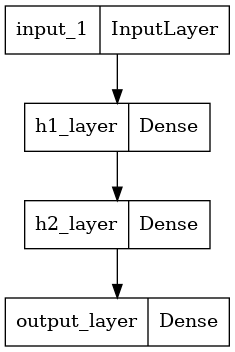

In [6]:
#This is an alternate way of displaying your model
#It requires you to install pydot, pydot plus and graphviz
#In your instance type these two commands:
# pip install pydot
# sudo apt-get install graphviz
#Some of those may already be part of the anaconda package installed on your GCP instance

#Try adding show_shapes=True and/or show_dtype=True as args to plot_model
plot_model(model)

[Return to Top](#top)
<a id = 'trainModel'></a>
### B4. Training a model

#### Define the dataset

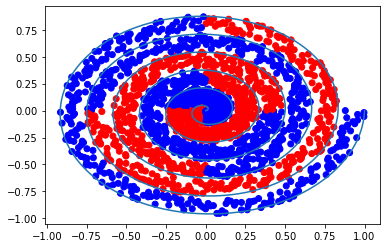

In [7]:
# Let's look at some data and labels:

import matplotlib.pyplot as plt
import numpy as np
nrotate =  6
size = 2040
theta = np.linspace(start = 0, stop = nrotate * 2 * np.pi, num = size)
len(theta)
r = 1/(nrotate * 2 * np.pi) * theta
x = r * np.cos(theta)
y = r * np.sin(theta)
# Toggle the below line to see the dividing line between groups
plt.plot(x, y)
# thickness = 1/(nrotate * 2 * np.pi) * 2 pi = 1 / nrotate
1 / nrotate * np.random.uniform(size = 100)
eps = 0.8
nparts = 4
colors = []
for i in range(nparts):
    colors.extend(['r']*int(size / (2*nparts)) + ['b']*int(size / (2*nparts)))
labels = ['r']*int(size/nparts) + ['b']*int(size/nparts)+['r']*int(size/nparts) + ['b']*int(size/nparts)
rjitter = r - eps / nrotate * np.random.uniform(size = size)
xjitter = rjitter*np.cos(theta)
yjitter = rjitter*np.sin(theta)
plt.scatter(xjitter, yjitter, color = colors)

In [8]:
from sklearn.model_selection import train_test_split
# Convert our data to numpy arrays with correct shapes for our model input, output
datain = np.transpose(np.vstack([x,y]))
labels = np.array([1 if color=='b' else 0 for color in colors]).reshape([-1,1])

# Create training, eval split
train_input, test_input, train_labels, test_labels = train_test_split(datain, labels, test_size = 0.2, 
                                                         random_state = 41,
                                                         shuffle = True)
# Train the model using our training input, labels
## the validation_split arguments states that 20% of the training data is to be used
## ...as dev data.
model.fit(train_input, train_labels, batch_size = 400, validation_split=0.2, epochs = 300)

Epoch 1/300
4/4 [==============================] - 2s 59ms/step - loss: 0.6910 - sparse_categorical_accuracy: 0.5448 - val_loss: 0.6875 - val_sparse_categorical_accuracy: 0.5168
Epoch 2/300
4/4 [==============================] - 0s 10ms/step - loss: 0.6754 - sparse_categorical_accuracy: 0.5992 - val_loss: 0.6830 - val_sparse_categorical_accuracy: 0.5627
Epoch 3/300
4/4 [==============================] - 0s 10ms/step - loss: 0.6649 - sparse_categorical_accuracy: 0.6544 - val_loss: 0.6803 - val_sparse_categorical_accuracy: 0.5994
Epoch 4/300
4/4 [==============================] - 0s 10ms/step - loss: 0.6569 - sparse_categorical_accuracy: 0.6766 - val_loss: 0.6778 - val_sparse_categorical_accuracy: 0.6208
Epoch 5/300
4/4 [==============================] - 0s 10ms/step - loss: 0.6504 - sparse_categorical_accuracy: 0.6889 - val_loss: 0.6747 - val_sparse_categorical_accuracy: 0.6177
Epoch 6/300
4/4 [==============================] - 0s 10ms/step - loss: 0.6431 - sparse_categorical_accuracy: 

Epoch 47/300
4/4 [==============================] - 0s 10ms/step - loss: 0.5771 - sparse_categorical_accuracy: 0.7134 - val_loss: 0.6095 - val_sparse_categorical_accuracy: 0.6636
Epoch 48/300
4/4 [==============================] - 0s 10ms/step - loss: 0.5756 - sparse_categorical_accuracy: 0.7073 - val_loss: 0.6072 - val_sparse_categorical_accuracy: 0.6606
Epoch 49/300
4/4 [==============================] - 0s 10ms/step - loss: 0.5750 - sparse_categorical_accuracy: 0.7088 - val_loss: 0.6083 - val_sparse_categorical_accuracy: 0.6728
Epoch 50/300
4/4 [==============================] - 0s 10ms/step - loss: 0.5734 - sparse_categorical_accuracy: 0.7126 - val_loss: 0.6058 - val_sparse_categorical_accuracy: 0.6820
Epoch 51/300
4/4 [==============================] - 0s 11ms/step - loss: 0.5720 - sparse_categorical_accuracy: 0.7195 - val_loss: 0.6047 - val_sparse_categorical_accuracy: 0.6850
Epoch 52/300
4/4 [==============================] - 0s 10ms/step - loss: 0.5710 - sparse_categorical_accu

Epoch 93/300
4/4 [==============================] - 0s 10ms/step - loss: 0.5106 - sparse_categorical_accuracy: 0.7747 - val_loss: 0.5381 - val_sparse_categorical_accuracy: 0.7309
Epoch 94/300
4/4 [==============================] - 0s 10ms/step - loss: 0.5086 - sparse_categorical_accuracy: 0.7563 - val_loss: 0.5400 - val_sparse_categorical_accuracy: 0.7187
Epoch 95/300
4/4 [==============================] - 0s 10ms/step - loss: 0.5086 - sparse_categorical_accuracy: 0.7448 - val_loss: 0.5404 - val_sparse_categorical_accuracy: 0.7248
Epoch 96/300
4/4 [==============================] - 0s 10ms/step - loss: 0.5056 - sparse_categorical_accuracy: 0.7670 - val_loss: 0.5322 - val_sparse_categorical_accuracy: 0.7523
Epoch 97/300
4/4 [==============================] - 0s 10ms/step - loss: 0.5067 - sparse_categorical_accuracy: 0.7724 - val_loss: 0.5322 - val_sparse_categorical_accuracy: 0.7462
Epoch 98/300
4/4 [==============================] - 0s 10ms/step - loss: 0.5077 - sparse_categorical_accu

4/4 [==============================] - 0s 10ms/step - loss: 0.4247 - sparse_categorical_accuracy: 0.8184 - val_loss: 0.4521 - val_sparse_categorical_accuracy: 0.7768
Epoch 139/300
4/4 [==============================] - 0s 10ms/step - loss: 0.4240 - sparse_categorical_accuracy: 0.8031 - val_loss: 0.4564 - val_sparse_categorical_accuracy: 0.7951
Epoch 140/300
4/4 [==============================] - 0s 10ms/step - loss: 0.4197 - sparse_categorical_accuracy: 0.8253 - val_loss: 0.4516 - val_sparse_categorical_accuracy: 0.8073
Epoch 141/300
4/4 [==============================] - 0s 10ms/step - loss: 0.4169 - sparse_categorical_accuracy: 0.8215 - val_loss: 0.4478 - val_sparse_categorical_accuracy: 0.8104
Epoch 142/300
4/4 [==============================] - 0s 10ms/step - loss: 0.4151 - sparse_categorical_accuracy: 0.8245 - val_loss: 0.4432 - val_sparse_categorical_accuracy: 0.8104
Epoch 143/300
4/4 [==============================] - 0s 10ms/step - loss: 0.4149 - sparse_categorical_accuracy: 0.

4/4 [==============================] - 0s 10ms/step - loss: 0.3194 - sparse_categorical_accuracy: 0.8697 - val_loss: 0.3494 - val_sparse_categorical_accuracy: 0.8502
Epoch 184/300
4/4 [==============================] - 0s 10ms/step - loss: 0.3171 - sparse_categorical_accuracy: 0.8766 - val_loss: 0.3471 - val_sparse_categorical_accuracy: 0.8532
Epoch 185/300
4/4 [==============================] - 0s 10ms/step - loss: 0.3155 - sparse_categorical_accuracy: 0.8820 - val_loss: 0.3459 - val_sparse_categorical_accuracy: 0.8532
Epoch 186/300
4/4 [==============================] - 0s 11ms/step - loss: 0.3130 - sparse_categorical_accuracy: 0.8766 - val_loss: 0.3460 - val_sparse_categorical_accuracy: 0.8471
Epoch 187/300
4/4 [==============================] - 0s 10ms/step - loss: 0.3121 - sparse_categorical_accuracy: 0.8759 - val_loss: 0.3387 - val_sparse_categorical_accuracy: 0.8563
Epoch 188/300
4/4 [==============================] - 0s 10ms/step - loss: 0.3089 - sparse_categorical_accuracy: 0.

4/4 [==============================] - 0s 10ms/step - loss: 0.2226 - sparse_categorical_accuracy: 0.9188 - val_loss: 0.2525 - val_sparse_categorical_accuracy: 0.8991
Epoch 229/300
4/4 [==============================] - 0s 10ms/step - loss: 0.2206 - sparse_categorical_accuracy: 0.9180 - val_loss: 0.2435 - val_sparse_categorical_accuracy: 0.8960
Epoch 230/300
4/4 [==============================] - 0s 10ms/step - loss: 0.2155 - sparse_categorical_accuracy: 0.9188 - val_loss: 0.2452 - val_sparse_categorical_accuracy: 0.8899
Epoch 231/300
4/4 [==============================] - 0s 10ms/step - loss: 0.2157 - sparse_categorical_accuracy: 0.9172 - val_loss: 0.2429 - val_sparse_categorical_accuracy: 0.8930
Epoch 232/300
4/4 [==============================] - 0s 10ms/step - loss: 0.2135 - sparse_categorical_accuracy: 0.9188 - val_loss: 0.2345 - val_sparse_categorical_accuracy: 0.8991
Epoch 233/300
4/4 [==============================] - 0s 10ms/step - loss: 0.2128 - sparse_categorical_accuracy: 0.

4/4 [==============================] - 0s 10ms/step - loss: 0.1401 - sparse_categorical_accuracy: 0.9747 - val_loss: 0.1637 - val_sparse_categorical_accuracy: 0.9541
Epoch 274/300
4/4 [==============================] - 0s 10ms/step - loss: 0.1387 - sparse_categorical_accuracy: 0.9808 - val_loss: 0.1571 - val_sparse_categorical_accuracy: 0.9572
Epoch 275/300
4/4 [==============================] - 0s 10ms/step - loss: 0.1364 - sparse_categorical_accuracy: 0.9732 - val_loss: 0.1555 - val_sparse_categorical_accuracy: 0.9541
Epoch 276/300
4/4 [==============================] - 0s 10ms/step - loss: 0.1364 - sparse_categorical_accuracy: 0.9579 - val_loss: 0.1550 - val_sparse_categorical_accuracy: 0.9664
Epoch 277/300
4/4 [==============================] - 0s 10ms/step - loss: 0.1342 - sparse_categorical_accuracy: 0.9824 - val_loss: 0.1541 - val_sparse_categorical_accuracy: 0.9786
Epoch 278/300
4/4 [==============================] - 0s 10ms/step - loss: 0.1337 - sparse_categorical_accuracy: 0.

In [9]:
# Evaluate the data with our test_input, test_labels
model.evaluate(test_input, test_labels)

13/13 [==============================] - 0s 1ms/step - loss: 0.1245 - sparse_categorical_accuracy: 0.9828


[0.12450914829969406, 0.9828431606292725]

[Return to Top](#top)
<a id = 'saveModel'></a>
### B5. Saving a model

In [10]:
# Saving the model
model.save("./keras_qs_model")

INFO:tensorflow:Assets written to: ./keras_qs_model/assets


[Return to Top](#top)
<a id = 'reloadModel'></a>
### B6. Reloading a model

In [11]:
# Ensure that reloaded model evaluates to same score as when we saved it originally.
model2 = keras.models.load_model("./keras_qs_model")
model2.evaluate(train_input, train_labels)

51/51 [==============================] - 0s 1ms/step - loss: 0.1060 - sparse_categorical_accuracy: 0.9902


[0.10600195080041885, 0.9901960492134094]

[Return to Top](#top)
<a id = 'functionWrapper'></a>
## C. Defining your model inside a function to add flexibility

In [11]:
# If you want to re-run your model with different settings and hyper-parameters there's a good chance you'll benefit by using a class definition.

# Define parameters in a dictionary
modelparams = dict(
    layers = ( (200, 'relu'), (100, 'relu') ), 
    n_classes = 2, # number of output classes -- 2 for binary
    learning_rate = 0.01, 
    output_activation = "sigmoid",
    loss = "sparse_categorical_crossentropy",
    optimizer = "adam",
    metrics = ["sparse_categorical_accuracy"]
)


def basic_km(**kwargs):
    layers = kwargs.get('layers', ((10, 'relu')) ) 
    n_classes = kwargs.get('n_classes', 2)
    learning_rate = kwargs.get('learning_rate', 0.01)
    output_activation = kwargs.get('output_activation', "sigmoid")
    optimizer = kwargs.get('optimizer', "adam")
    loss = kwargs.get('loss', "categorical_crossentropy")
    metrics = kwargs.get('metrics', ["accuracy"])
    
    num_layers = len(layers)
    
    graph = []
    # Define input shape
    graph.append(keras.Input(shape=(2,)))
    # Add hidden layers
    for i, layer in enumerate(layers):
        graph.append(keras.layers.Dense(layer[0], activation = layer[1], name = "h" + str(i+1) + "layer"   ))
    # Add output layer
    graph.append(keras.layers.Dense(n_classes, activation = output_activation, name="output_layer"))
    
    # Define a sequential model from inputs and outputs of graph
    model = keras.Sequential(graph)
    
    # Compile the model
    model.compile(loss = loss, optimizer = optimizer, metrics = metrics)
    return model

modelFromDef = basic_km(**modelparams)

# Train model 
modelFromDef.fit(train_input, train_labels, batch_size = 400, validation_split=0.2, epochs = 300)    
        

Epoch 1/300
4/4 [==============================] - 1s 60ms/step - loss: 0.6895 - sparse_categorical_accuracy: 0.5410 - val_loss: 0.6874 - val_sparse_categorical_accuracy: 0.4893
Epoch 2/300
4/4 [==============================] - 0s 14ms/step - loss: 0.6766 - sparse_categorical_accuracy: 0.5548 - val_loss: 0.6838 - val_sparse_categorical_accuracy: 0.5199
Epoch 3/300
4/4 [==============================] - 0s 14ms/step - loss: 0.6683 - sparse_categorical_accuracy: 0.5808 - val_loss: 0.6818 - val_sparse_categorical_accuracy: 0.5382
Epoch 4/300
4/4 [==============================] - 0s 14ms/step - loss: 0.6602 - sparse_categorical_accuracy: 0.6192 - val_loss: 0.6773 - val_sparse_categorical_accuracy: 0.5841
Epoch 5/300
4/4 [==============================] - 0s 14ms/step - loss: 0.6529 - sparse_categorical_accuracy: 0.6805 - val_loss: 0.6731 - val_sparse_categorical_accuracy: 0.6483
Epoch 6/300
4/4 [==============================] - 0s 13ms/step - loss: 0.6463 - sparse_categorical_accuracy: 

Epoch 47/300
4/4 [==============================] - 0s 11ms/step - loss: 0.5851 - sparse_categorical_accuracy: 0.6789 - val_loss: 0.6208 - val_sparse_categorical_accuracy: 0.6453
Epoch 48/300
4/4 [==============================] - 0s 11ms/step - loss: 0.5849 - sparse_categorical_accuracy: 0.6789 - val_loss: 0.6188 - val_sparse_categorical_accuracy: 0.6300
Epoch 49/300
4/4 [==============================] - 0s 11ms/step - loss: 0.5827 - sparse_categorical_accuracy: 0.6897 - val_loss: 0.6222 - val_sparse_categorical_accuracy: 0.6514
Epoch 50/300
4/4 [==============================] - 0s 11ms/step - loss: 0.5829 - sparse_categorical_accuracy: 0.6950 - val_loss: 0.6210 - val_sparse_categorical_accuracy: 0.6483
Epoch 51/300
4/4 [==============================] - 0s 11ms/step - loss: 0.5817 - sparse_categorical_accuracy: 0.6920 - val_loss: 0.6146 - val_sparse_categorical_accuracy: 0.6453
Epoch 52/300
4/4 [==============================] - 0s 11ms/step - loss: 0.5804 - sparse_categorical_accu

Epoch 93/300
4/4 [==============================] - 0s 11ms/step - loss: 0.5386 - sparse_categorical_accuracy: 0.7395 - val_loss: 0.5636 - val_sparse_categorical_accuracy: 0.7309
Epoch 94/300
4/4 [==============================] - 0s 11ms/step - loss: 0.5369 - sparse_categorical_accuracy: 0.7487 - val_loss: 0.5640 - val_sparse_categorical_accuracy: 0.7217
Epoch 95/300
4/4 [==============================] - 0s 11ms/step - loss: 0.5354 - sparse_categorical_accuracy: 0.7410 - val_loss: 0.5661 - val_sparse_categorical_accuracy: 0.7003
Epoch 96/300
4/4 [==============================] - 0s 11ms/step - loss: 0.5344 - sparse_categorical_accuracy: 0.7418 - val_loss: 0.5649 - val_sparse_categorical_accuracy: 0.7187
Epoch 97/300
4/4 [==============================] - 0s 11ms/step - loss: 0.5335 - sparse_categorical_accuracy: 0.7464 - val_loss: 0.5634 - val_sparse_categorical_accuracy: 0.7187
Epoch 98/300
4/4 [==============================] - 0s 11ms/step - loss: 0.5331 - sparse_categorical_accu

4/4 [==============================] - 0s 11ms/step - loss: 0.3782 - sparse_categorical_accuracy: 0.8406 - val_loss: 0.4073 - val_sparse_categorical_accuracy: 0.8196
Epoch 184/300
4/4 [==============================] - 0s 11ms/step - loss: 0.3740 - sparse_categorical_accuracy: 0.8452 - val_loss: 0.4016 - val_sparse_categorical_accuracy: 0.8226
Epoch 185/300
4/4 [==============================] - 0s 11ms/step - loss: 0.3752 - sparse_categorical_accuracy: 0.8460 - val_loss: 0.4010 - val_sparse_categorical_accuracy: 0.8410
Epoch 186/300
4/4 [==============================] - 0s 11ms/step - loss: 0.3703 - sparse_categorical_accuracy: 0.8529 - val_loss: 0.4117 - val_sparse_categorical_accuracy: 0.8104
Epoch 187/300
4/4 [==============================] - 0s 11ms/step - loss: 0.3710 - sparse_categorical_accuracy: 0.8437 - val_loss: 0.4038 - val_sparse_categorical_accuracy: 0.8226
Epoch 188/300
4/4 [==============================] - 0s 11ms/step - loss: 0.3667 - sparse_categorical_accuracy: 0.

4/4 [==============================] - 0s 14ms/step - loss: 0.2034 - sparse_categorical_accuracy: 0.9172 - val_loss: 0.2330 - val_sparse_categorical_accuracy: 0.8960
Epoch 274/300
4/4 [==============================] - 0s 14ms/step - loss: 0.2007 - sparse_categorical_accuracy: 0.9203 - val_loss: 0.2303 - val_sparse_categorical_accuracy: 0.8991
Epoch 275/300
4/4 [==============================] - 0s 13ms/step - loss: 0.2005 - sparse_categorical_accuracy: 0.9264 - val_loss: 0.2349 - val_sparse_categorical_accuracy: 0.9083
Epoch 276/300
4/4 [==============================] - 0s 14ms/step - loss: 0.1978 - sparse_categorical_accuracy: 0.9272 - val_loss: 0.2246 - val_sparse_categorical_accuracy: 0.9083
Epoch 277/300
4/4 [==============================] - 0s 13ms/step - loss: 0.1973 - sparse_categorical_accuracy: 0.9272 - val_loss: 0.2273 - val_sparse_categorical_accuracy: 0.9052
Epoch 278/300
4/4 [==============================] - 0s 12ms/step - loss: 0.1968 - sparse_categorical_accuracy: 0.